In [3]:
#!pip install yfinance

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
symbols = pd.read_csv('Financial_Data.csv', usecols=['Symbol'])
symbols = symbols.drop(symbols[symbols.Symbol == 'Null'].index).reset_index() #drops missing symbols
data = pd.DataFrame(columns=['Symbol','Date','Open','Close','Low','High','Volume','Dividends','Stock Splits'])
hist_period = '10y' # 10 year historical data

Historical Stock Data

In [7]:
for index in range((len(symbols))):
    ticker = yf.Ticker(symbols['Symbol'][index])
    hist_data = ticker.history(period=hist_period)
    hist_data['Symbol'] = symbols['Symbol'][index] #adds a column for the stock symbol
    hist_data['Date'] = hist_data.index.to_series() #makes a date column from datetime index
    data = pd.concat([data,hist_data],axis=0)

- BRK.A: No data found, symbol may be delisted


Data Cleaning and Transformation

In [8]:
dups = data[data.duplicated()] #Check for duplicates
dups

,Symbol,Date,Open,Close,Low,High,Volume,Dividends,Stock Splits,Adj Close


In [9]:
data['Open'] = round(data['Open'],2)
data['High'] = round(data['High'],2)
data['Low'] = round(data['Low'],2)
data['Close'] = round(data['Close'],2)

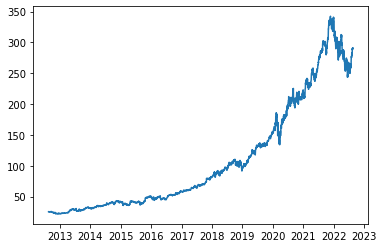

In [10]:
#Check stock history for accruacy
df = data.loc[data['Symbol'] == 'MSFT']
plt.plot(df['Date'],df['Open'])

In [11]:
#drops the index column and other unused columns to match data table
data = data.drop(columns=['Stock Splits','Adj Close']).reset_index(drop=True) 
data.head()

,Symbol,Date,Open,Close,Low,High,Volume,Dividends
0,WMT,2012-08-20,57.57,57.80,57.29,57.89,5548700,0.0
1,WMT,2012-08-21,57.80,57.11,57.11,57.83,7634200,0.0
2,WMT,2012-08-22,57.04,57.38,57.04,57.44,6661000,0.0
3,WMT,2012-08-23,57.40,57.21,57.08,57.51,6005100,0.0
4,WMT,2012-08-24,57.07,57.65,57.04,57.72,5190100,0.0


In [12]:
path=os.path.join(os.getcwd(),'Historical_Stock_Data.csv')
path
csv = data.to_csv(path) #Loads data to CSV to be manually loaded in IBM cloud